### Problem 1
Từ dữ liệu về chiều cao, cân nặng trong file **Data_hight_weight_of_female.xlsx** bạn hãy dùng Linear Regression để dự đoán cân nặng dựa vào chiều cao, và trực quan hóa

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [146]:
meta = pd.read_excel(r'D:\Lab2 - TeamAI (Kiến thức LinearRegression)\Data_height_weight_of_female.xlsx')
meta['Chiều cao'] = meta['Chiều cao'].apply(lambda x: float(x.replace('cm', '')))
meta['Cân nặng'] = meta['Cân nặng'].apply(lambda x: float(x.replace('kg', '')))

$y = wx + b $

Cost Function 
$J(y) = \frac{1}{2m} * \sum (\hat{y} - y )^2$

Gradient descent

$w = w - \alpha \frac{\partial J}{\partial w}$

$b = b - \alpha \frac{\partial J}{\partial b}$

$\frac{\partial J}{\partial w} = \frac{1}{m} *\sum (wx + b - y ) * x$ 

$\frac{\partial J}{\partial b} = \frac{1}{m} *\sum (wx + b - y )$ 

In [506]:
import matplotlib.pyplot as plt

In [234]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(x, y, w, b):
    m = len(x)
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

def derivative(x, y, w, b):
    dw = 0
    db = 0
    m = len(x)
    for i in range(len(x)):
        
        y_hat = w * x[i] + b
        dw += (y_hat - y[i]) * x[i]
        db += (y_hat - y[i])
    return dw / m, db / m

def GD(x, y, w, b, alpha, num_iterations):
    cost = np.zeros(num_iterations)
    w_values = np.zeros(num_iterations)
    b_values = np.zeros(num_iterations)
    m = len(x)
    
    for i in range(num_iterations):
        dw, db = derivative(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost[i] = cost_function(x, y, w, b)
        w_values[i] = w
        b_values[i] = b
        print(f'iter {i}: Cost = {cost[i]}')
    id = np.argmin(cost)
    plt.plot(w_values, cost,  label='w vs cost')
    return w_values[id], b_values[id]

iter 0: Cost = 527.0627599180045
iter 1: Cost = 397.4980795457381
iter 2: Cost = 302.8096622179573
iter 3: Cost = 233.609484926426
iter 4: Cost = 183.03660091233888
iter 5: Cost = 146.0768990698893
iter 6: Cost = 119.0659711089086
iter 7: Cost = 99.3257973697392
iter 8: Cost = 84.8992298684202
iter 9: Cost = 74.35594742814189
iter 10: Cost = 66.65064397823552
iter 11: Cost = 61.01938985095089
iter 12: Cost = 56.903890635067704
iter 13: Cost = 53.89613409757781
iter 14: Cost = 51.697937095432415
iter 15: Cost = 50.09138168498825
iter 16: Cost = 48.917209265386
iter 17: Cost = 48.0590306053235
iter 18: Cost = 47.43178622864017
iter 19: Cost = 46.973313043409576
iter 20: Cost = 46.63818107319292
iter 21: Cost = 46.393189222368
iter 22: Cost = 46.21407349528859
iter 23: Cost = 46.08310129989161
iter 24: Cost = 45.98731331876438
iter 25: Cost = 45.91723863489697
iter 26: Cost = 45.86595572100872
iter 27: Cost = 45.82840619258993
iter 28: Cost = 45.80089328550015
iter 29: Cost = 45.780715333

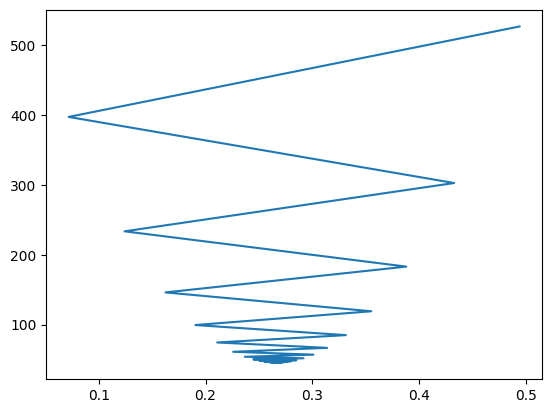

In [249]:
w, b = GD(list(meta['Chiều cao']), list(meta['Cân nặng']), 0, 0, 0.0001, 120)

In [250]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept=False) 
regr.fit(np.array(meta['Chiều cao']).reshape(-1, 1), np.array(meta['Cân nặng']).reshape(-1, 1))

regr.predict(np.array(test['Chiều cao']).reshape(-1, 1))

array([[43.3050532 ],
       [43.35835172],
       [43.41165025],
       [43.41165025],
       [43.46494878],
       [43.46494878],
       [43.49159804]])

In [251]:
for x in test['Chiều cao']:
    print(w*x + b)

43.30791262074635
43.361236290376674
43.414559960007
43.414559960007
43.46788362963732
43.46788362963732
43.49454546445248


### Problem 2
Từ dữ liệu file **Data_GPA_harvard.xlsx** bạn hãy dùng Linear Regression để dự đoán Điểm GPA của một sinh viên dựa vào chỉ số IQ và thời gian học trong một ngày của sinh viên đó

In [399]:
# Code ở đây

In [491]:
data = pd.read_excel(r'D:\Lab2 - TeamAI (Kiến thức LinearRegression)\Data_GPA_harvard.xlsx')
data.head(5)

,IQ,hours per day,GPA
0,97,16,3.08
1,115,14,3.27
2,100,4,2.22
3,91,8,2.35
4,135,13,3.58


In [492]:
data.describe()

,IQ,hours per day,GPA
count,50.000000,50.000000,50.000000
mean,116.080000,8.120000,2.843400
std,18.623926,4.662661,0.527716
min,86.000000,1.000000,1.880000
25%,100.000000,4.000000,2.355000
50%,115.000000,8.000000,2.940000
75%,131.500000,12.000000,3.230000
max,144.000000,16.000000,3.830000


In [493]:
data.dtypes

IQ                 int64
hours per day      int64
GPA              float64
dtype: object

$Y = w*X + b$

In [494]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(x, y, w, b):
    m = len(x)
    cost = 0

    for i in range(m):
        f_wb = w @ x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost[0]

In [495]:
def derivative(x, y, w, b):
    dw = 0
    db = 0
    m = len(x)
    for i in range(len(x)):
        y_hat =x[i].reshape(1, -1) @ w.T + b
        dw += (y_hat - y[i]) @ x[i].reshape(1, -1)
        db += (y_hat - y[i])
    return dw.reshape(1, -1) / m, db.reshape(1, -1) / m

def GD(x, y, w, b, alpha, num_iterations):
    cost = np.zeros(num_iterations)
    w_values = []
    b_values = []
    m = len(x)
    
    for i in range(num_iterations):
        dw, db = derivative(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db[0][0]
        
        cost[i] = cost_function(x, y, w, b)
        w_values.extend(w)
        b_values.append(b)
        print(f'iter {i}: Cost = {cost[i]}')
    id = np.argmin(cost)
    plt.plot(w_values, cost,  label='w vs cost')
    return w_values[id], b_values[id]

iter 0: Cost = 0.6809470977025894
iter 1: Cost = 0.1538526215585991
iter 2: Cost = 0.07423838704544142
iter 3: Cost = 0.06202545070552252
iter 4: Cost = 0.05996558658161254
iter 5: Cost = 0.05943595257124709
iter 6: Cost = 0.059137755467511655
iter 7: Cost = 0.05887536441846094
iter 8: Cost = 0.05861930902653278
iter 9: Cost = 0.05836514631929579
iter 10: Cost = 0.058112203020948584
iter 11: Cost = 0.05786037367227346
iter 12: Cost = 0.057609638357227065
iter 13: Cost = 0.057359990061915216
iter 14: Cost = 0.05711142373318623
iter 15: Cost = 0.05686393463053987
iter 16: Cost = 0.056617518077813615
iter 17: Cost = 0.05637216942570637
iter 18: Cost = 0.056127884046059284
iter 19: Cost = 0.05588465733092044
iter 20: Cost = 0.05564248469233005
iter 21: Cost = 0.05540136156221452
iter 22: Cost = 0.055161283392297616
iter 23: Cost = 0.0549222456540141
iter 24: Cost = 0.05468424383842428
iter 25: Cost = 0.05444727345612899
iter 26: Cost = 0.05421133003718483
iter 27: Cost = 0.0539764091310198

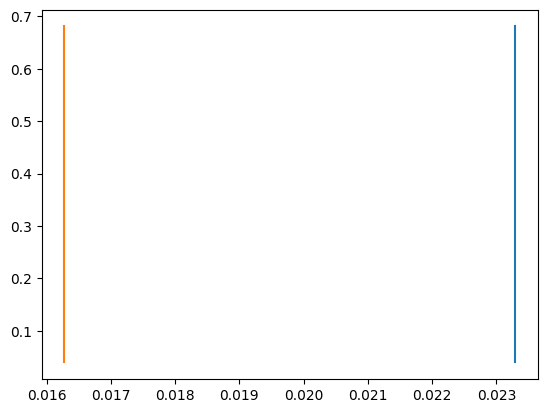

In [502]:
import random
random.uniform(-1, 1)
w = np.array([0. for i in range(data.shape[1]-1)]).reshape(1, -1)
b = 0
w, b = GD(np.array(data[data.columns.difference(['GPA'])]), np.array(data[['GPA']]), w, b, 0.0001, 100)

In [503]:
test = data[-5:]
test

,IQ,hours per day,GPA
45,106,3,2.26
46,100,5,2.30
47,138,12,3.56
48,142,5,3.10
49,95,6,2.28


In [504]:
x = np.array(test[test.columns.difference(['GPA'])])
x

array([[106,   3],
       [100,   5],
       [138,  12],
       [142,   5],
       [ 95,   6]], dtype=int64)

In [505]:
for i in range(len(x)):
    print(x[i].reshape(1, -1) @ w.T + b)

[2.51812824]
[2.41091837]
[3.40995229]
[3.38921116]
[2.31072807]
